In [2]:
# Load the necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [3]:
# Setup logger
def setup_logger(name, log_file, level=logging.INFO):
    """Function to setup a logger."""
    formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')

    # Create the log directory if it does not exist
    if not os.path.exists(os.path.dirname(log_file)):
        os.makedirs(os.path.dirname(log_file))

    handler = logging.FileHandler(log_file)        
    handler.setFormatter(formatter)

    logger = logging.getLogger(name)
    logger.setLevel(level)
    logger.addHandler(handler)

    return logger

In [4]:
# Setup logger
logger = setup_logger('eda_logger', '../logs/eda.log')

In [5]:
# Load data
train_df = pd.read_csv(r'../data/train.csv', low_memory=False)
test_df = pd.read_csv(r'../data/test.csv', low_memory=False)
store_df = pd.read_csv(r'../data/store.csv', low_memory=False)


In [6]:
# Log the data loading
logger.info('Train, test, and store data loaded.')

In [7]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Cleaning and Preparing 
the train and test data for preprocessing

In [10]:
# Merge train data with store data
train_data = train_df.merge(store_df, on='Store', how='left')
logger.info('Training data merged with store data and columns Customers, PromoInterval dropped.')

# Merge test data with store data
test_data = test_df.merge(store_df, on='Store', how='left')
logger.info('Testing data merged with store data and columns Id, PromoInterval dropped.')


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [12]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [14]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [15]:
# Handle missing values
logger.info("Handling missing values...")
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

# Detect and handle outliers
logger.info("Detecting and handling outliers...")

# Remove outliers in 'Sales' based on IQR
Q1 = train_data['Sales'].quantile(0.25)
Q3 = train_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
train_data = train_data[~((train_data['Sales'] < (Q1 - 1.5 * IQR)) | (train_data['Sales'] > (Q3 + 1.5 * IQR)))]
train_data

logger.info("Missing values and outliers handled.")

C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_12152\3354467145.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_12152\3354467145.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [16]:
#Preprocessing training data
# Identify categorical columns
cat_cols = [col for col in train_data.columns if train_data[col].dtype == "object"]
logger.info(f'Categorical columns: {cat_cols}')
cat_cols

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [17]:
# Display unique values and counts for categorical columns
for col in cat_cols:
    logger.info(f"{col} data has {train_data[col].nunique()} unique values.")
    logger.info(f"{col} data sample values: \n{train_data[col].value_counts()}\n")


In [18]:
# Drop rows with missing values
train_data.dropna(inplace=True)
logger.info('Rows with missing values dropped.')

In [19]:
# Feature engineering: Extract date features

logger.info('Extracting date features...')
# Convert dates to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day
train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day
test_data['DayOfWeek'] = test_data['Date'].dt.dayofweek
logger.info('Date features extracted.')

In [20]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
5,6,4,2015-07-31,5651,589,1,1,0,1,a,...,310.0,12.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31


In [21]:
# Convert categorical columns to numerical
logger.info('Converting categorical columns to numerical...')
train_data['StateHoliday'] = train_data['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
train_data['StoreType'] = train_data['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})
train_data['Assortment'] = train_data['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

test_data['StateHoliday'] = test_data['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
test_data['StoreType'] = test_data['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})
test_data['Assortment'] = test_data['Assortment'].map({'a': 1, 'b': 2, 'c': 3})
logger.info('Categorical columns converted to numerical.')

In [22]:
# Relocate the target column 'Sales' to the end
sales = train_data.pop('Sales')
train_data['Sales'] = sales
logger.info('Target column Sales relocated to the end.')
train_data

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Sales
1,2,4,2015-07-31,625,1,1,0,1,1,1,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,6064
2,3,4,2015-07-31,821,1,1,0,1,1,1,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,8314
3,4,4,2015-07-31,1498,1,1,0,1,3,3,...,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,13995
4,5,4,2015-07-31,559,1,1,0,1,1,1,...,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,4822
5,6,4,2015-07-31,589,1,1,0,1,1,1,...,12.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,5651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,1,1,1,1,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0
1017205,1112,1,2013-01-01,0,0,0,1,1,3,3,...,4.0,2006.0,0,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0
1017206,1113,1,2013-01-01,0,0,0,1,1,1,3,...,4.0,2006.0,0,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0
1017207,1114,1,2013-01-01,0,0,0,1,1,1,3,...,4.0,2006.0,0,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0


In [23]:
# Display the preprocessed data
logger.info(f'Preprocessed data sample: \n{train_data.head()}')
print(train_data.head())

   Store  DayOfWeek       Date  Customers  Open  Promo  StateHoliday  \
1      2          4 2015-07-31        625     1      1             0   
2      3          4 2015-07-31        821     1      1             0   
3      4          4 2015-07-31       1498     1      1             0   
4      5          4 2015-07-31        559     1      1             0   
5      6          4 2015-07-31        589     1      1             0   

   SchoolHoliday  StoreType  Assortment  ...  CompetitionOpenSinceMonth  \
1              1          1           1  ...                       11.0   
2              1          1           1  ...                       12.0   
3              1          3           3  ...                        9.0   
4              1          1           1  ...                        4.0   
5              1          1           1  ...                       12.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
1                    2007.0       1        

# Exploratory Data Analysis (EDA)

INFO:eda_logger:Comparing promotion distribution between training and test sets...
C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_12152\1066525531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=train_data, palette='Blues', label='Train')
C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_12152\1066525531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=test_data, palette='Reds', label='Test')


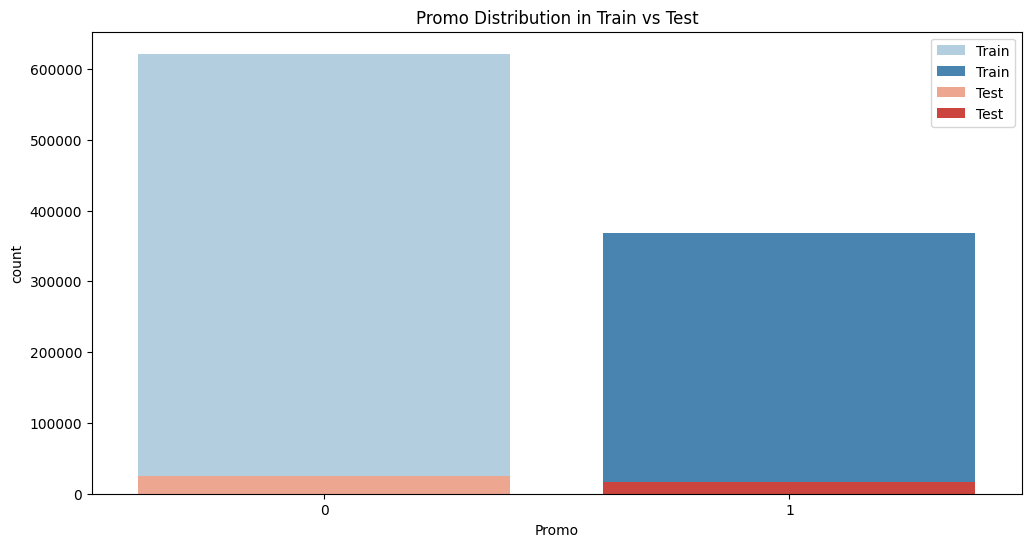

In [30]:
# 1. Distribution of Promotions in Train vs Test
logger.info("Comparing promotion distribution between training and test sets...")
plt.figure(figsize=(12,6))


sns.countplot(x='Promo', data=train_data, palette='Blues', label='Train')


sns.countplot(x='Promo', data=test_data, palette='Reds', label='Test')
plt.title('Promo Distribution in Train vs Test')
plt.legend()
plt.show()
logging.info('Promo distribution plotted.')